In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import re

from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.downloader.download('vader_lexicon')
from textblob import TextBlob


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\finnp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\finnp\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
dataset = pd.read_csv('AppleDataset.csv')

In [3]:
dataset_apple = dataset.copy()
dataset_apple.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,News
0,2006-12-01,13.114285,13.190000,12.871428,91.320000,13.045714,198769900,WHAT'S ON TONIGHT : 8 P.M. (TLC) ASHLEY JUDD A...
1,2006-12-04,13.125714,13.150000,12.928572,91.120003,13.017143,177384200,More on Housing Prices : The broadest governme...
2,2006-12-05,13.092857,13.190000,12.981428,91.269997,13.038571,165709600,NaN
3,2006-12-06,12.948571,13.055715,12.810000,89.830002,12.832857,159546100,Honoring R.W. Apple in Words and Food : About ...
4,2006-12-07,12.861428,12.928572,12.414286,87.040001,12.434286,251206900,"Homebuilders, and Worries Over Jobs, Lead a De..."


In [4]:
#УДАЛЯЕМ СТРОКИ С ПУСТЫМИ ЗНАЧЕНИЯМИ

In [5]:
dataset_apple.replace('NaN', pd.NA, inplace=True)
dataset_apple.dropna(subset=['News'], inplace=True)
dataset_apple.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,News
0,2006-12-01,13.114285,13.190000,12.871428,91.320000,13.045714,198769900,WHAT'S ON TONIGHT : 8 P.M. (TLC) ASHLEY JUDD A...
1,2006-12-04,13.125714,13.150000,12.928572,91.120003,13.017143,177384200,More on Housing Prices : The broadest governme...
3,2006-12-06,12.948571,13.055715,12.810000,89.830002,12.832857,159546100,Honoring R.W. Apple in Words and Food : About ...
4,2006-12-07,12.861428,12.928572,12.414286,87.040001,12.434286,251206900,"Homebuilders, and Worries Over Jobs, Lead a De..."
5,2006-12-08,12.461429,12.770000,12.428572,88.259995,12.608571,196069300,"Homebuilders, and Worries Over Jobs, Lead a De..."


In [6]:
#УДАЛЯЕМ ОДИНАКОВЫЕ НОВОСТИ

In [7]:
dataset_apple.drop_duplicates(subset ="News", keep = 'first', inplace = True)
dataset_apple.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,News
0,2006-12-01,13.114285,13.190000,12.871428,91.320000,13.045714,198769900,WHAT'S ON TONIGHT : 8 P.M. (TLC) ASHLEY JUDD A...
1,2006-12-04,13.125714,13.150000,12.928572,91.120003,13.017143,177384200,More on Housing Prices : The broadest governme...
3,2006-12-06,12.948571,13.055715,12.810000,89.830002,12.832857,159546100,Honoring R.W. Apple in Words and Food : About ...
4,2006-12-07,12.861428,12.928572,12.414286,87.040001,12.434286,251206900,"Homebuilders, and Worries Over Jobs, Lead a De..."
5,2006-12-08,12.461429,12.770000,12.428572,88.259995,12.608571,196069300,"Homebuilders, and Worries Over Jobs, Lead a De..."


In [8]:
#ПРИВОДИМ К НИЖНЕМУ РЕГИСТРУ

In [9]:
dataset_apple['News'] = dataset_apple['News'].str.lower()
dataset_apple.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,News
0,2006-12-01,13.114285,13.190000,12.871428,91.320000,13.045714,198769900,what's on tonight : 8 p.m. (tlc) ashley judd a...
1,2006-12-04,13.125714,13.150000,12.928572,91.120003,13.017143,177384200,more on housing prices : the broadest governme...
3,2006-12-06,12.948571,13.055715,12.810000,89.830002,12.832857,159546100,honoring r.w. apple in words and food : about ...
4,2006-12-07,12.861428,12.928572,12.414286,87.040001,12.434286,251206900,"homebuilders, and worries over jobs, lead a de..."
5,2006-12-08,12.461429,12.770000,12.428572,88.259995,12.608571,196069300,"homebuilders, and worries over jobs, lead a de..."


In [10]:
dataset_apple.to_csv('apple_clear.csv')

In [11]:
#УДАЛИМ ЛИШНИЕ СИМВОЛЫ

In [12]:
dataset_apple['News'] = dataset_apple['News'].apply(lambda x: re.sub(r'\.{2,}', '.', x))  # Замена множественных точек на одну
dataset_apple['News'] = dataset_apple['News'].apply(lambda x: re.sub(r"''|\"\"|--", '', x))  # Удаление специфических символов
# Удаление стоп-слов
dataset_apple.head(5)


,Date,Open,High,Low,Close,Adj Close,Volume,News
0,2006-12-01,13.114285,13.190000,12.871428,91.320000,13.045714,198769900,what's on tonight : 8 p.m. (tlc) ashley judd a...
1,2006-12-04,13.125714,13.150000,12.928572,91.120003,13.017143,177384200,more on housing prices : the broadest governme...
3,2006-12-06,12.948571,13.055715,12.810000,89.830002,12.832857,159546100,honoring r.w. apple in words and food : about ...
4,2006-12-07,12.861428,12.928572,12.414286,87.040001,12.434286,251206900,"homebuilders, and worries over jobs, lead a de..."
5,2006-12-08,12.461429,12.770000,12.428572,88.259995,12.608571,196069300,"homebuilders, and worries over jobs, lead a de..."


In [13]:
dataset_apple.to_csv('apple_test.csv')

Стемминг

In [14]:
stemmer = PorterStemmer()

# Функция для стемминга текста
def stem_sentence(sentence):
    tokens = word_tokenize(sentence)
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)
# Применение стемминга к каждой строке в столбце News
dataset_apple['News'] = dataset_apple['News'].apply(stem_sentence)

dataset_apple.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,News
0,2006-12-01,13.114285,13.190000,12.871428,91.320000,13.045714,198769900,what 's on tonight : 8 p.m. ( tlc ) ashley jud...
1,2006-12-04,13.125714,13.150000,12.928572,91.120003,13.017143,177384200,more on hous price : the broadest govern measu...
3,2006-12-06,12.948571,13.055715,12.810000,89.830002,12.832857,159546100,"honor r.w . appl in word and food : about 1,00..."
4,2006-12-07,12.861428,12.928572,12.414286,87.040001,12.434286,251206900,"homebuild , and worri over job , lead a declin..."
5,2006-12-08,12.461429,12.770000,12.428572,88.259995,12.608571,196069300,"homebuild , and worri over job , lead a declin..."


In [15]:
#ОПРЕДЕЛИМ СЕНТИМЕНТ

In [16]:
sia = SentimentIntensityAnalyzer()
def apply_sentiment(row):
    sentiment = sia.polarity_scores(row['News'])
    return pd.Series([sentiment['neg'], sentiment['neu'], sentiment['pos'], sentiment['compound']])
dataset_apple[['neg', 'neu', 'pos', 'compound']] = dataset_apple.apply(apply_sentiment, axis=1)
dataset_apple.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,News,neg,neu,pos,compound
0,2006-12-01,13.114285,13.190000,12.871428,91.320000,13.045714,198769900,what 's on tonight : 8 p.m. ( tlc ) ashley jud...,0.028,0.892,0.079,0.8720
1,2006-12-04,13.125714,13.150000,12.928572,91.120003,13.017143,177384200,more on hous price : the broadest govern measu...,0.011,0.934,0.055,0.7717
3,2006-12-06,12.948571,13.055715,12.810000,89.830002,12.832857,159546100,"honor r.w . appl in word and food : about 1,00...",0.028,0.908,0.064,0.5106
4,2006-12-07,12.861428,12.928572,12.414286,87.040001,12.434286,251206900,"homebuild , and worri over job , lead a declin...",0.064,0.907,0.029,-0.4404
5,2006-12-08,12.461429,12.770000,12.428572,88.259995,12.608571,196069300,"homebuild , and worri over job , lead a declin...",0.062,0.877,0.061,0.2263


TextBlob будет использоваться для получения оценок субъективности и полярности очищенных и объединенных данных новостей. Полярность — это число с плавающей запятой, которое находится в диапазоне [-1,1], где 1 означает положительное утверждение, а -1 означает отрицательное утверждение. Субъективные предложения обычно относятся к личному мнению, эмоциям или суждениям, тогда как объективные относятся к фактической информации. Субъективность также является плавающей точкой, которая находится в диапазоне [0,1], где 0 — объективно, а 1 — субъективно.

In [17]:
def Subjectivity(news):
  return TextBlob(news).sentiment.subjectivity

def Polarity(news):
  return TextBlob(news).sentiment.polarity

dataset_apple['subjectivity'] = dataset_apple['News'].apply(Subjectivity)
dataset_apple['polarity'] = dataset_apple['News'].apply(Polarity)
dataset_apple.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,News,neg,neu,pos,compound,subjectivity,polarity
0,2006-12-01,13.114285,13.190000,12.871428,91.320000,13.045714,198769900,what 's on tonight : 8 p.m. ( tlc ) ashley jud...,0.028,0.892,0.079,0.8720,0.420857,-0.015121
1,2006-12-04,13.125714,13.150000,12.928572,91.120003,13.017143,177384200,more on hous price : the broadest govern measu...,0.011,0.934,0.055,0.7717,0.354261,0.246591
3,2006-12-06,12.948571,13.055715,12.810000,89.830002,12.832857,159546100,"honor r.w . appl in word and food : about 1,00...",0.028,0.908,0.064,0.5106,0.315584,-0.046753
4,2006-12-07,12.861428,12.928572,12.414286,87.040001,12.434286,251206900,"homebuild , and worri over job , lead a declin...",0.064,0.907,0.029,-0.4404,0.227273,0.068182
5,2006-12-08,12.461429,12.770000,12.428572,88.259995,12.608571,196069300,"homebuild , and worri over job , lead a declin...",0.062,0.877,0.061,0.2263,0.220455,0.163636


In [18]:
dataset_apple.to_csv('Full_data.csv')

Зададим метки классов: 0 - цена закрытия на следующий день будет ниже сегодняшней, 1 - цена закрытия на следующий день будет выше сегодняшней. В дальнейшем при помощи классификации мы попробуем предсказать движение цены на следующий день

In [19]:
prices = dataset_apple[['Date', 'Adj Close']]
prices['Adj Close TMRW'] = prices['Adj Close'].shift(-1)
prices['Label'] = prices.apply(lambda x: 1 if (x['Adj Close TMRW']>= x['Adj Close']) else 0, axis =1)
prices = prices.drop(prices.index[-1]) #удалим последнюю строку, т.к. для нее нельзя определить класс
prices

C:\Users\finnp\AppData\Local\Temp\ipykernel_11664\1486174731.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prices['Adj Close TMRW'] = prices['Adj Close'].shift(-1)
C:\Users\finnp\AppData\Local\Temp\ipykernel_11664\1486174731.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prices['Label'] = prices.apply(lambda x: 1 if (x['Adj Close TMRW']>= x['Adj Close']) else 0, axis =1)


,Date,Adj Close,Adj Close TMRW,Label
0,2006-12-01,13.045714,13.017143,0
1,2006-12-04,13.017143,12.832857,0
3,2006-12-06,12.832857,12.434286,0
4,2006-12-07,12.434286,12.608571,1
5,2006-12-08,12.608571,12.678572,1
...,...,...,...,...
2507,2016-11-16,109.989998,109.949997,0
2508,2016-11-17,109.949997,110.059998,1
2509,2016-11-18,110.059998,111.730003,1
2510,2016-11-21,111.730003,111.800003,1


In [20]:
first_dataset = dataset_apple.drop(['Adj Close', 'News'], axis=1)
first_dataset = first_dataset.drop(first_dataset.index[-1]) #удалим последнюю строку, т.к. для нее нельзя определить класс
full_data = pd.merge(first_dataset, prices, on='Date', how='right')
full_data

,Date,Open,High,Low,Close,Volume,neg,neu,pos,compound,subjectivity,polarity,Adj Close,Adj Close TMRW,Label
0,2006-12-01,13.114285,13.190000,12.871428,91.320000,198769900,0.028,0.892,0.079,0.8720,0.420857,-0.015121,13.045714,13.017143,0
1,2006-12-04,13.125714,13.150000,12.928572,91.120003,177384200,0.011,0.934,0.055,0.7717,0.354261,0.246591,13.017143,12.832857,0
2,2006-12-06,12.948571,13.055715,12.810000,89.830002,159546100,0.028,0.908,0.064,0.5106,0.315584,-0.046753,12.832857,12.434286,0
3,2006-12-07,12.861428,12.928572,12.414286,87.040001,251206900,0.064,0.907,0.029,-0.4404,0.227273,0.068182,12.434286,12.608571,1
4,2006-12-08,12.461429,12.770000,12.428572,88.259995,196069300,0.062,0.877,0.061,0.2263,0.220455,0.163636,12.608571,12.678572,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2317,2016-11-16,106.699997,110.230003,106.599998,109.989998,58840500,0.067,0.728,0.205,0.9870,0.350715,0.224840,109.989998,109.949997,0
2318,2016-11-17,109.809998,110.349998,108.830002,109.949997,27632000,0.030,0.878,0.092,0.9455,0.430960,0.165455,109.949997,110.059998,1
2319,2016-11-18,109.720001,110.540001,109.660004,110.059998,28428900,0.047,0.861,0.092,0.7935,0.415509,0.079977,110.059998,111.730003,1
2320,2016-11-21,110.120003,111.989998,110.010002,111.730003,29264600,0.112,0.810,0.078,-0.8462,0.471429,0.150000,111.730003,111.800003,1


In [21]:
full_data.to_csv('for_classification.csv')

In [22]:
full_data['Date'] = pd.to_datetime(full_data['Date']) #преобразуем колонку с датой в числовое представление
full_data.set_index('Date', inplace=True)

Разобьем датасет на обучающую и тестовую выборки

In [23]:
features = np.array(full_data.drop(['Label', 'Adj Close TMRW'], axis=1))
labels = np.array(full_data['Label'])

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.35, random_state=2)
print(f"X train shape:{X_train.shape}")
print(f"y train shape:{y_train.shape}")
print(f"X test shape:{X_test.shape}")
print(f"y test shape:{y_test.shape}")

X train shape:(1509, 12)
y train shape:(1509,)
X test shape:(813, 12)
y test shape:(813,)


Проведем нормализацию данных для их последующего использования в классификаторах

In [24]:

X_train = scale(X_train)
X_test = scale(X_test)

D:\Python\Lib\site-packages\sklearn\preprocessing\_data.py:246: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(


lr best params: {'C': 11.288378916846883, 'solver': 'liblinear'}
lr best score: 0.5367793240556661
knn best params: {'metric': 'manhattan', 'n_neighbors': 5}
knn best score: 0.5314777998674619
rf best params: {'max_features': None, 'n_estimators': 100}
rf best score: 0.5301524188204109
mlp best params: {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive', 'solver': 'sgd'}
mlp best score: 0.534128561961564

lr - Confusion Matrix:


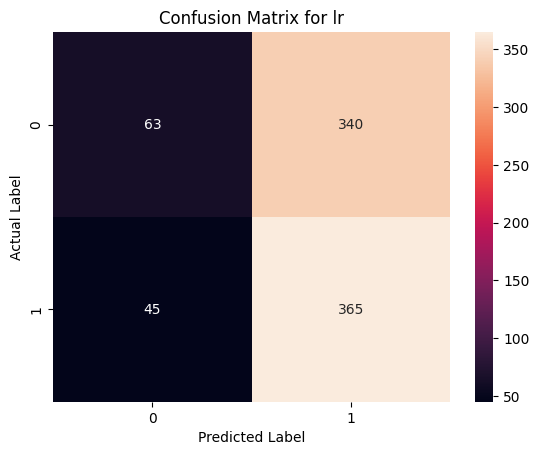


lr - Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.16      0.25       403
           1       0.52      0.89      0.65       410

    accuracy                           0.53       813
   macro avg       0.55      0.52      0.45       813
weighted avg       0.55      0.53      0.45       813


knn - Confusion Matrix:


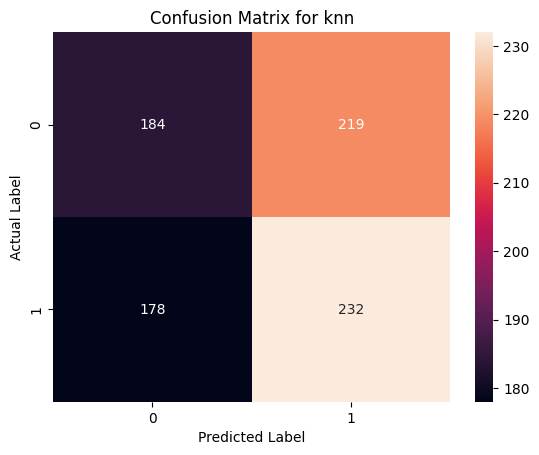


knn - Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.46      0.48       403
           1       0.51      0.57      0.54       410

    accuracy                           0.51       813
   macro avg       0.51      0.51      0.51       813
weighted avg       0.51      0.51      0.51       813


rf - Confusion Matrix:


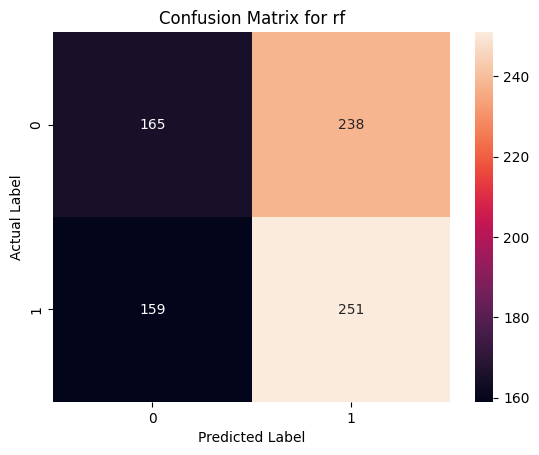


rf - Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.41      0.45       403
           1       0.51      0.61      0.56       410

    accuracy                           0.51       813
   macro avg       0.51      0.51      0.51       813
weighted avg       0.51      0.51      0.51       813


mlp - Confusion Matrix:


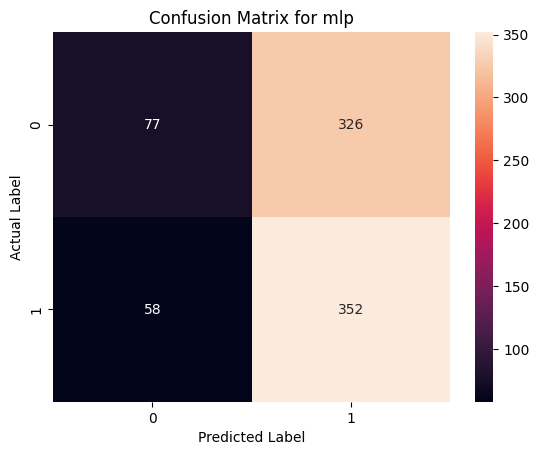


mlp - Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.19      0.29       403
           1       0.52      0.86      0.65       410

    accuracy                           0.53       813
   macro avg       0.54      0.52      0.47       813
weighted avg       0.54      0.53      0.47       813



In [25]:
classifiers = {
    'lr': LogisticRegression(),
    'knn': KNeighborsClassifier(),
    'rf': RandomForestClassifier(),
    'mlp': MLPClassifier(max_iter=3000)
}

# Параметры для GridSearch
parameters = {
    'lr': {'C': np.logspace(-4, 4, 20), 'solver': ['liblinear']},
    'knn': {'n_neighbors': list(range(1, 11)), 'metric': ['euclidean', 'manhattan']},
    'rf': {'n_estimators': [10, 50, 100, 200], 'max_features': [None, 'sqrt', 'log2']},
    'mlp': { 
        'hidden_layer_sizes': [(50,), (100,), (50,50)],
        'activation': ['tanh', 'relu'],
        'solver': ['sgd', 'adam'],
        'alpha': [0.0001, 0.05],
        'learning_rate': ['constant', 'adaptive'],
    }
}

best_models = {}

# Grid search для каждого классификатора
for name, classifier in classifiers.items():
    clf = GridSearchCV(classifier, parameters[name], cv=3, scoring='accuracy')
    clf.fit(X_train, y_train)
    best_models[name] = clf.best_estimator_
    print(f"{name} best params: {clf.best_params_}")
    print(f"{name} best score: {clf.best_score_}")

# Вывод матриц ошибок и classification report для лучших моделей
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(f"\n{name} - Confusion Matrix:")
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title(f'Confusion Matrix for {name}')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.show()
    print(f"\n{name} - Classification Report:")
    print(classification_report(y_test, y_pred))